# Simple ANN

ANN (Artificail Neural Network)
* **ANN (Artificail Neural Network):** usually simply called neural networks (NNs), are computing systems vaguely inspired by the biological neural networks 
* Our **ANN** is focusing on classification which number is, when **ANN** gets ficture of number (MNIST)
* An artificial neural network is an interconnected group of nodes, there are input layer, hidden layer, output layer
* We are using Keras module

<hr>

How to use this notebook :

There is only minimum explanation

This notebook could be helpful for who want to see how code works right away

Please upvote if it was helpful !

<hr>

## Content
1. [Libraries import](#one)
2. [Prepare Data](#two)
3. [Modeling](#three)
4. [Training & Evaluation](#four)

<hr>

<a id="one"></a>
# 1. Libraries import

In [1]:
from keras import layers, models
import numpy as np # to use reshape()
from keras import datasets  # we can bring our mnist data from here
from keras.utils import np_utils  # to_categorical
import matplotlib.pyplot as plt


<a id="two"></a>
# 2. Prepare Data

* 70000 data ( 60000 for training, 10000 for test)
* 28 * 28 (each pixel can have 0~255 value)
* 0 ~ 9 (10 classes)
* example)

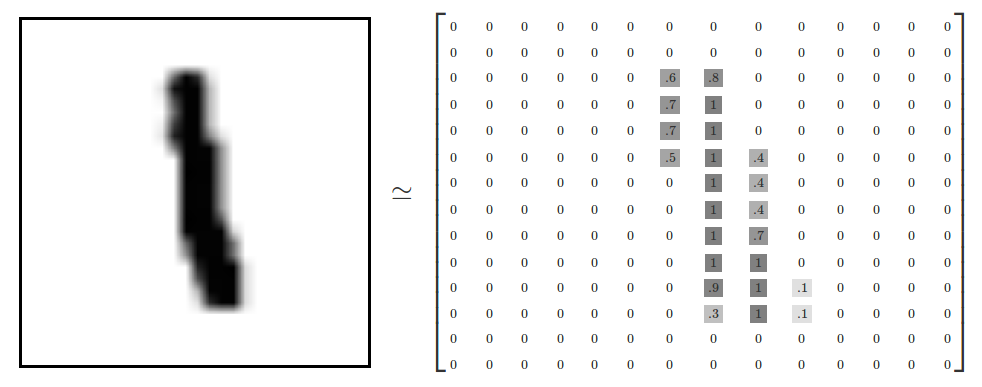

In [2]:
# bring our data

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# check 

print(X_train.shape)
print(X_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [4]:
# check

X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

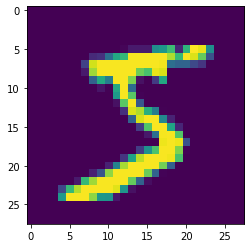

In [5]:
# check

plt.imshow(X_train[0])
plt.show()

In [6]:
# we change from output(0~9) to output((0 or 1) * 10) vector for ANN classification

Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [7]:
# we need to change 3 dimention data to 2 dimention for training

L, H, W = X_train.shape
X_train = X_train.reshape(-1,W*H) # -1 means auto
X_test = X_test.reshape(-1,W*H)

In [8]:
X_train.shape

(60000, 784)

In [9]:
# normalization

X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)

    L, W, H = X_train.shape
    X_train = X_train.reshape(-1, W * H)
    X_test = X_test.reshape(-1, W * H)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)

<a id="three"></a>
# 3. Modeliing

In [11]:
class ANN_models_class(models.Model) :
    def __init__(self,Nin,Nh,Nout) : # (Nin : input layer nodes), (Nh : hidden layer nodes), (Nout : output layer nodes)
        
        # Prepare network layers and activate functions
        hidden = layers.Dense(Nh) # our ANN has only one hidden layer
        output = layers.Dense(Nout)
        relu = layers.Activation('relu') 
        softmax = layers.Activation('softmax')
        
        # Connect network elements
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        y = softmax(output(h))
        
        super().__init__(x,y)
        self.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

<a id="four"></a>
# 4. Training & Evaluation

In [12]:
# check for accuracy

def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()
    
# check for loss

def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])     # training loss
    plt.plot(history['val_loss']) # validation loss
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()

Epoch 1/15
480/480 [==============================] - 2s 3ms/step - loss: 0.6705 - accuracy: 0.8158 - val_loss: 0.2037 - val_accuracy: 0.9421
Epoch 2/15
480/480 [==============================] - 1s 2ms/step - loss: 0.1929 - accuracy: 0.9457 - val_loss: 0.1574 - val_accuracy: 0.9573
Epoch 3/15
480/480 [==============================] - 1s 2ms/step - loss: 0.1424 - accuracy: 0.9591 - val_loss: 0.1352 - val_accuracy: 0.9615
Epoch 4/15
480/480 [==============================] - 1s 3ms/step - loss: 0.1120 - accuracy: 0.9686 - val_loss: 0.1172 - val_accuracy: 0.9653
Epoch 5/15
480/480 [==============================] - 1s 2ms/step - loss: 0.0893 - accuracy: 0.9753 - val_loss: 0.1101 - val_accuracy: 0.9674
Epoch 6/15
480/480 [==============================] - 1s 2ms/step - loss: 0.0742 - accuracy: 0.9794 - val_loss: 0.1031 - val_accuracy: 0.9682
Epoch 7/15
480/480 [==============================] - 1s 2ms/step - loss: 0.0613 - accuracy: 0.9828 - val_loss: 0.1032 - val_accuracy: 0.9691
Epoch 

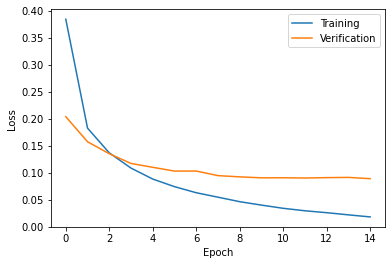

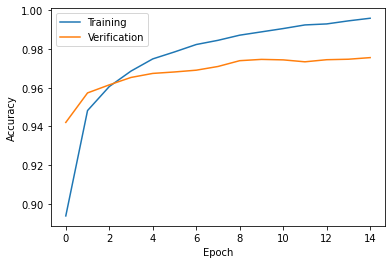

In [13]:
def main():
    Nin = 784 # input layer nodes
    Nh = 100 # hidden layer nodes
    number_of_class = 10 # output layer nodes
    Nout = number_of_class

    model = ANN_models_class(Nin, Nh, Nout)
    (X_train, Y_train), (X_test, Y_test) = Data_func()

 
    # Training
    history = model.fit(X_train, Y_train, epochs=15, batch_size=100, validation_split=0.2)
    
    # test
    performace_test = model.evaluate(X_test, Y_test, batch_size=100)
    print('Test Loss and Accuracy ->', performace_test)

    plot_loss(history)
    plt.show()
    plot_acc(history)
    plt.show()



# Run code
if __name__ == '__main__':
    main()

## Reference
* Coding chef 3 minute deep learning  -(https://github.com/jskDr/keraspp/blob/master/ex2_1_ann_mnist_cl.py)